In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
## Join train and test datasets in order to obtain the same number of features during categorical conversion
train_len = len(train)
titanic =  pd.concat(objs=[train, test], axis=0, join='outer', ignore_index=False, sort=False)
titanic["Survived"] = titanic["Survived"].fillna("NaN")

# Make a copy of the original DataFrame to perform edits on
titanic_df = titanic.copy()

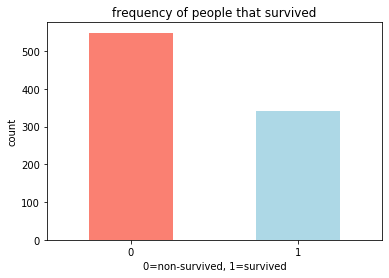

In [8]:
train["Survived"].value_counts().plot(
                                    kind="bar",
                                    color=["salmon", "lightblue"])

plt.ylabel("count")
plt.xlabel("0=non-survived, 1=survived")
plt.title("frequency of people that survived")
plt.xticks(rotation=0);

In [9]:
titanic_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
# A function that takes a dataframe and colume and find the % of the value count 
def percent_value_counts(df, feature):
    """selecting loction of selected feature column value count with null value"""

    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

### The cabin column has 77% missing data in, and in my opinon it should be dropped because of the amount of missing data


In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null object
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [12]:
percent_value_counts(titanic_df, 'Cabin')

,Total,Percent
NaN,1014,77.46
C23 C25 C27,6,0.46
G6,5,0.38
B57 B59 B63 B66,5,0.38
F2,4,0.31
...,...,...
A19,1,0.08
E10,1,0.08
C49,1,0.08
C97,1,0.08


In [13]:
titanic_df.drop(["Cabin"], axis=1, inplace=True)

In [14]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
percent_value_counts(titanic_df, "Embarked")

,Total,Percent
S,914,69.82
C,270,20.63
Q,123,9.40
NaN,2,0.15


In [16]:
## Replacing the null values in the Embarked column with the highest 
titanic_df.Embarked.fillna("S", inplace=True)

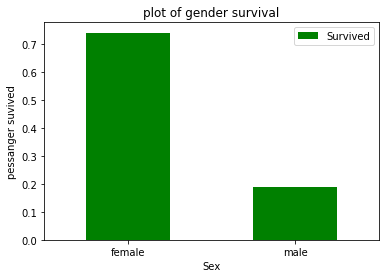

In [17]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot(
                                                        kind="bar",
                                                        color=["green"])
plt.title("plot of gender survival")
plt.ylabel("pessanger suvived")
plt.xticks(rotation=0);

In [18]:
titanic_df[titanic_df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [19]:
#replacing the fare missing value with the mean since it's only one missing 
titanic_df.Fare.fillna(titanic_df.Fare.mean(), inplace=True)
titanic_df.Fare

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 1309, dtype: float64

In [20]:
train.groupby("Survived")['Fare'].mean().sort_values()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
percent_value_counts(titanic_df, "Age")

,Total,Percent
NaN,263,20.09
24.00,47,3.59
22.00,43,3.28
21.00,41,3.13
30.00,40,3.06
...,...,...
22.50,1,0.08
74.00,1,0.08
24.50,1,0.08
80.00,1,0.08


In [23]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null object
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [25]:
# Create a family size descriptor from SibSp and Parch
titanic_df["Family_size"] = titanic_df["SibSp"] + titanic_df["Parch"] + 1

In [26]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
titanic_df['Initial']=0
for i in titanic_df:
    titanic_df['Initial']=titanic_df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [28]:
pd.crosstab(titanic_df.Initial, titanic_df.Sex)

Sex,female,male
Initial,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [29]:
titanic_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Miss'],inplace=True)

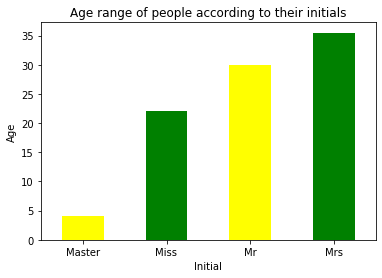

In [30]:
titanic_df.groupby("Initial")["Age"].median().plot(
                                    kind="bar",
                                    color=["yellow", "green"])

plt.ylabel("Age")
plt.title("Age range of people according to their initials")
plt.xticks(rotation=0);

In [31]:
## Assigning the NaN Values with the Ceil values of the median ages
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Initial=='Mr'),'Age']=30
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Initial=='Mrs'),'Age']=35
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Initial=='Master'),'Age']=4
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Initial=='Miss'),'Age']=23

In [32]:
percent_value_counts(titanic_df, 'Age')

,Total,Percent
30.00,217,16.58
23.00,77,5.88
35.00,50,3.82
24.00,47,3.59
22.00,43,3.28
...,...,...
11.50,1,0.08
26.50,1,0.08
76.00,1,0.08
24.50,1,0.08


In [33]:
# These columns contain strings
for label, content in titanic_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
    

Survived
Name
Sex
Ticket
Embarked
Initial


In [34]:
titanic_df.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [35]:
# Create categorical values for Pclass
titanic_df["Pclass"] = titanic_df["Pclass"].astype("category")
titanic_df["Sex"]= titanic_df["Sex"].astype("category")
titanic_df["Family_size"] = titanic_df["Family_size"].astype("category")
titanic_df = pd.get_dummies(titanic_df, columns = ["Pclass"])
titanic_df = pd.get_dummies(titanic_df, columns=["Sex"])
titanic_df = pd.get_dummies(titanic_df, columns=["Family_size"])
titanic_df = pd.get_dummies(titanic_df, columns = ["Initial"])
titanic_df = pd.get_dummies(titanic_df, columns = ["Embarked"])

In [36]:
titanic_df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Family_size_7,Family_size_8,Family_size_11,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1


(25.0, 0.0)

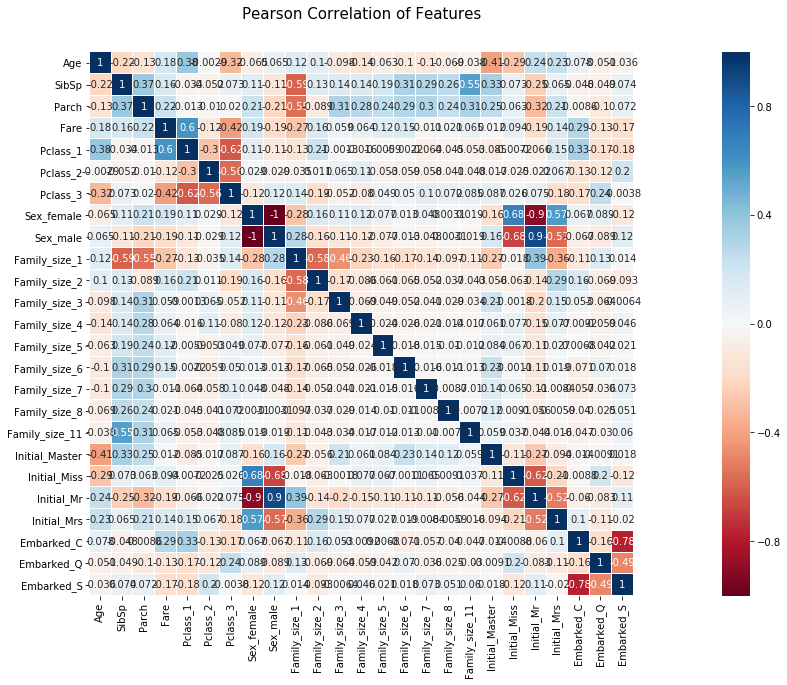

In [37]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
ax = sns.heatmap(titanic_df.corr(),
                 linewidths=0.1,
                 vmax=1.0, 
                 square=True,
                 cmap=colormap,
                 linecolor='white',
                 annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# Note that the categorical features have been neglected in the
# correlation matrix.

# Modeling 


In [38]:
## Separate train dataset and test dataset

train = titanic_df[:train_len]
test = titanic_df[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

C:\Users\Michael Ajao\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
train.describe()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Family_size_1,...,Family_size_7,Family_size_8,Family_size_11,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.454736,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.602694,...,0.013468,0.006734,0.007856,0.044893,0.208754,0.603816,0.142536,0.188552,0.086420,0.725028
std,13.203224,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.489615,...,0.115332,0.081830,0.088337,0.207186,0.406647,0.489378,0.349796,0.391372,0.281141,0.446751
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
## Separate train features and label 

train["Survived"] = train["Survived"].astype(int)

#Y_train = train["Survived"]

#X_train = train.drop(labels = ["Survived"],axis = 1)



C:\Users\Michael Ajao\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import LinearSVC #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.linear_model import SGDClassifier #stochastic gradient classifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [42]:
np.random.seed(42)
X = train.drop(["Survived"], axis=1)
y = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gaussian naive bayes": GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(),
          "Stochastic Gradient descent": SGDClassifier(),
          "Support vector machines": LinearSVC()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [44]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Michael Ajao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Michael Ajao\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Michael Ajao\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'Logistic Regression': 0.8100558659217877,
 'KNN': 0.7597765363128491,
 'Random Forest': 0.8268156424581006,
 'Gaussian naive bayes': 0.6703910614525139,
 'Decision Tree': 0.7653631284916201,
 'Stochastic Gradient descent': 0.39106145251396646,
 'Support vector machines': 0.7821229050279329}

## Model Compared together without tuning 

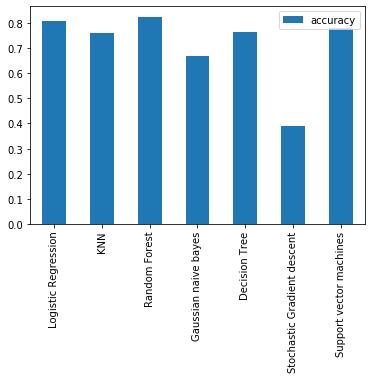

In [45]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [65]:

# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 20) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [66]:
train_scores

[0.9789325842696629,
 0.8539325842696629,
 0.8370786516853933,
 0.8146067415730337,
 0.8117977528089888,
 0.7865168539325843,
 0.7794943820224719,
 0.773876404494382,
 0.773876404494382,
 0.7598314606741573,
 0.7612359550561798,
 0.7528089887640449,
 0.7612359550561798,
 0.7528089887640449,
 0.7514044943820225,
 0.7443820224719101,
 0.7457865168539326,
 0.7514044943820225,
 0.7471910112359551]

Maximum KNN score on the test data: 77.09%


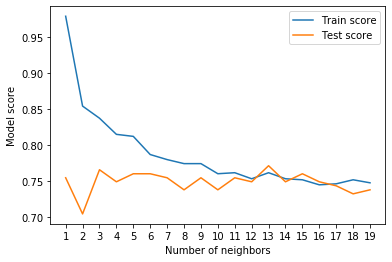

In [67]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")